In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

#pd.set_option('display.max_rows', 150)
#pd.set_option('display.min_rows', 65)
pd.set_option('display.max_columns', None)

In [2]:
df_base = pd.read_csv("..\Data_Sets\processed\economicData_1995-2022.csv")

df_base.drop(['GDP per capita (const 2015USD)','GDP per capita growth',
    'GDP PPP per capita (const 2017USD)','Country Quintile','Index Year'],axis = 1, inplace=True)

df_base = df_base[['Country Name', 'Overall Score', 'Property Rights',
       'Government Integrity', 'Judicial Effectiveness', 'Government Spending',
       'Tax Burden', 'Fiscal Health', 'Business Freedom', 'Monetary Freedom',
       'Labor Freedom', 'Financial Freedom', 'Investment Freedom',
       'Trade Freedom', 'GDP per capita (current USD)']]

In [3]:
# Drop columns with excessive missing data (more than 14% missing values)
df_base = df_base.dropna(thresh=len(df_base)*0.86, axis=1)

# Impute missing values using the median for each column
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(df_base.select_dtypes(include=['float64'])))
data_imputed.columns = df_base.select_dtypes(include=['float64']).columns
df_base[data_imputed.columns] = data_imputed

# Encode categorical columns
label_encoders = {}
for column in ['Country Name']:
    le = LabelEncoder()
    df_base[column] = le.fit_transform(df_base[column])
    label_encoders[column] = le

# Split the dataset into training and testing sets
X = df_base.drop('GDP per capita (current USD)', axis=1)
y = df_base['GDP per capita (current USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

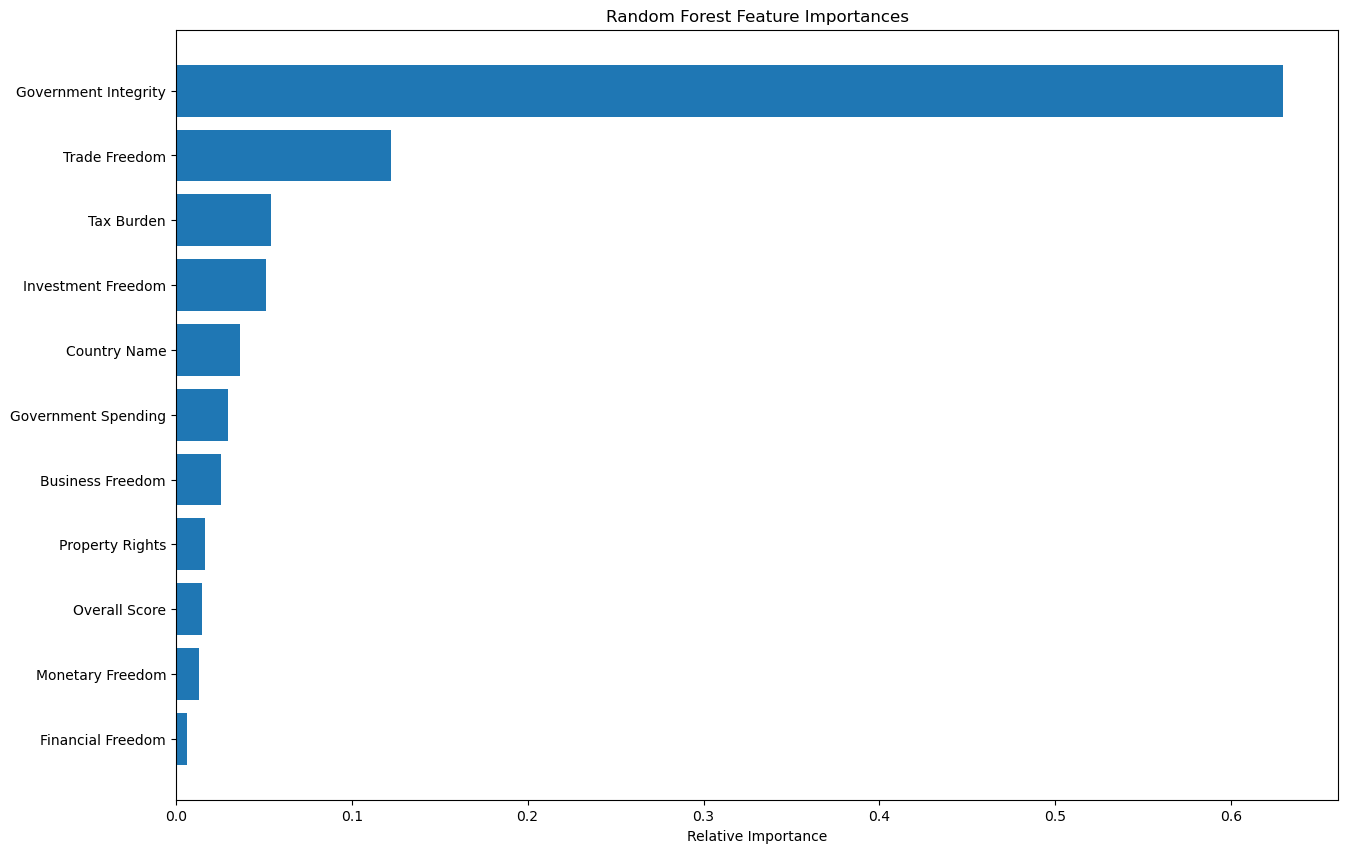

In [4]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(15, 10))
indices = feature_importances.argsort()[::-1]
plt.title("Random Forest Feature Importances")
plt.barh(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.gca().invert_yaxis()
plt.xlabel("Relative Importance")
plt.show()